# MFN vs TFN on ranking-based comparison with only 'useful' alter and at least 2 meetups

In [1]:
import numpy as np
import pandas as pd
import meetup_strategy as ms
import time 
import pickle
import util
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [7]:
import visualization as vs

## MFN details

In [2]:
MFN_details = pd.read_csv('final/wp_user-meetup-all-None.csv')

In [15]:
MFN_info = MFN_details[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                 'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
MFN_info = MFN_info.rename({'Included Rank': 'Included', 
                            'userid_x': 'userid',
                            'Pi': 'Pi_ego'}, axis=1)

MFN_info['Pi_alters_ratio'] = MFN_info['Pi_alters'] / MFN_info['Pi_ego'] 
MFN_info['Pi_ego_alters_ratio'] = MFN_info['Pi_ego_alters'] / MFN_info['Pi_ego'] 

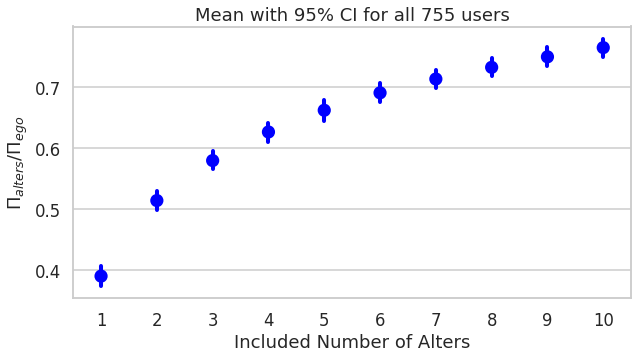

In [16]:
vs.cv_plot(MFN_info[MFN_info['n_meetupers_x'] >=10], threshold=10, plot_type='errorbar', mode='talk', l=10, w=5)

## TFN details

In [10]:
TFN_details =pd.read_csv('final/wp-true_user-meetup-all-None.csv')

In [13]:
TFN_info = TFN_details[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                 'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
TFN_info = TFN_info.rename({'Included Rank': 'Included', 
                              'userid_x': 'userid',
                             'Pi': 'Pi_ego'}, axis=1)

TFN_info['Pi_alters_ratio'] = TFN_info['Pi_alters'] / TFN_info['Pi_ego'] 
TFN_info['Pi_ego_alters_ratio'] = TFN_info['Pi_ego_alters'] / TFN_info['Pi_ego'] 

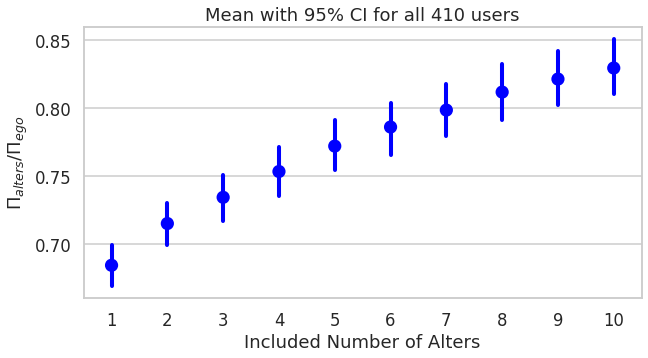

In [14]:
vs.cv_plot(TFN_info[TFN_info['n_meetupers_x'] >=10], threshold=10, plot_type='errorbar', mode='talk', l=10, w=5)

## Compare MFN and TFN, different egos in these networks

In [17]:
MFN_info['category'] = 'Meetup Friendship'
TFN_info['category'] = 'True Friendship'

In [18]:
twin_networks = pd.concat([MFN_info, TFN_info])

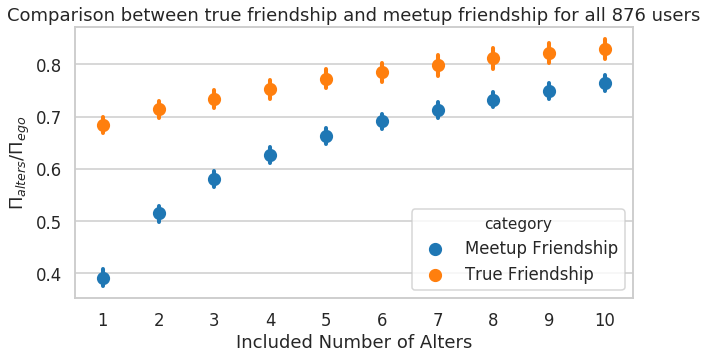

In [19]:
vs.cv_compare_plot(twin_networks[twin_networks['n_meetupers_x'] >=10], threshold=10, mode='talk', l=10, w=5)

## Compare MFN and TFN, shared egos in both networks

In [20]:
share_users = list(set(MFN_info['userid'].tolist()) & set(TFN_info['userid'].tolist()) )
len(share_users)

4605

In [27]:
share_users = list(set(MFN_info[MFN_info['n_meetupers_x'] >=10]['userid'].tolist()) & 
                   set(TFN_info[TFN_info['n_meetupers_x']>=10]['userid'].tolist()) )
len(share_users)

289

In [28]:
share_network = pd.concat([MFN_info[MFN_info['userid'].isin(share_users)], 
                           TFN_info[TFN_info['userid'].isin(share_users)]])

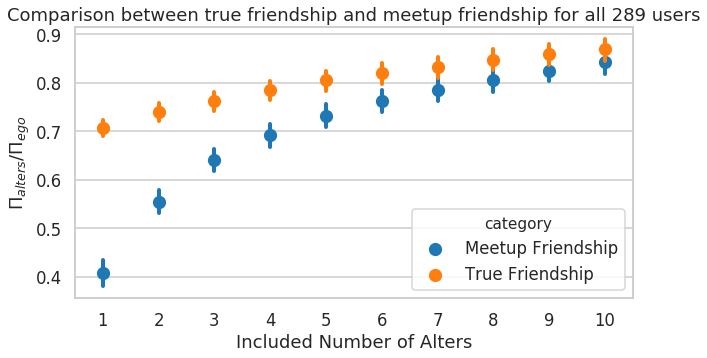

In [29]:
# vs.cv_compare_plot(share_network[share_network['n_meetupers_x'] >=10], threshold=10, mode='talk', l=10, w=5)
vs.cv_compare_plot(share_network, threshold=10, mode='talk', l=10, w=5)